In [2]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(parallel)
library(ComplexHeatmap)
library(ggsci)
library(tidyverse)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘purrr’


The following object is masked from ‘package:plyr’:

    compact


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: grid

ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cit

## file_list - IL1B+ Cd14 mono

In [181]:
# file_list<-list.files(path = paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_3"), pattern = ".csv", all.files = FALSE,
#            full.names = TRUE, recursive = FALSE,
#            ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)

In [182]:
# DEG_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))
# DEG<-do.call(rbind,DEG_list)

In [414]:
DEG_male <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male/IL1B+ CD14 monocyte_Y1D0.csv")
DEG_male$test_num <- "Unchanged_sample_size_Male"
#DEG_male

In [415]:
DEG_female <-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/IL1B+ CD14 monocyte_Y1D0.csv")
DEG_female$test_num <- "Unchanged_sample_size_Female"

In [416]:
# DEG1 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_1/IL1B+ CD14 monocyte_Y1D0.csv")
# DEG1$test_num <- "Female_Test_1"

In [417]:
# DEG2 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_2/IL1B+ CD14 monocyte_Y1D0.csv")
# DEG2$test_num <- "Female_Test_2"

In [418]:
# DEG3 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_3/IL1B+ CD14 monocyte_Y1D0.csv")
# DEG3$test_num <- "Female_Test_3"

In [419]:
DEG_CMV_1 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_1/IL1B+ CD14 monocyte_Y1D0.csv")                                  
DEG_CMV_1$test_num <- "Female_downsample_CMV_samplesize_Test_1"

In [420]:
DEG_CMV_2 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_2/IL1B+ CD14 monocyte_Y1D0.csv")                                  
DEG_CMV_2$test_num <- "Female_downsample_CMV_samplesize_Test_2"

In [421]:
DEG_CMV_3 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_2/IL1B+ CD14 monocyte_Y1D0.csv")                                  
DEG_CMV_3$test_num <- "Female_downsample_CMV_samplesize_Test_3"

In [422]:
# Create a list of data frames
DEG_list <- list(DEG_male, DEG_female, DEG_CMV_1, DEG_CMV_2, DEG_CMV_3 )

# Combine the data frames using do.call and rbind
DEG <- do.call(rbind, DEG_list)


In [423]:
DEG$test_num %>% unique()
DEG$celltype %>% unique()

[1] "Unchanged_sample_size_Male"             
[2] "Unchanged_sample_size_Female"           
[3] "Female_downsample_CMV_samplesize_Test_1"
[4] "Female_downsample_CMV_samplesize_Test_2"
[5] "Female_downsample_CMV_samplesize_Test_3"

[1] "IL1B+ CD14 monocyte"

In [424]:
unique(DEG$Direction)

[1] "BR1" "BR2"

In [425]:
#head(DEG)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,test_num
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CCDC115,3.555371,-0.6669224,0.2057432,-3.241529,0.0011889053,0.5164025,IL1B+ CD14 monocyte,BR1,Y1,Unchanged_sample_size_Male
2,NABP1,14.517155,-0.5610775,0.1695893,-3.308450,0.0009381404,0.5164025,IL1B+ CD14 monocyte,BR1,Y1,Unchanged_sample_size_Male
3,TADA3,4.288629,-0.6258226,0.1925724,-3.249805,0.0011548429,0.5164025,IL1B+ CD14 monocyte,BR1,Y1,Unchanged_sample_size_Male
4,CAMK2D,4.958832,-0.7456421,0.2300710,-3.240922,0.0011914363,0.5164025,IL1B+ CD14 monocyte,BR1,Y1,Unchanged_sample_size_Male
5,UIMC1,3.458288,-0.6923697,0.2073623,-3.338938,0.0008409945,0.5164025,IL1B+ CD14 monocyte,BR1,Y1,Unchanged_sample_size_Male
6,SERPINB9,10.943509,-0.6486679,0.1959577,-3.310244,0.0009321459,0.5164025,IL1B+ CD14 monocyte,BR1,Y1,Unchanged_sample_size_Male


In [426]:
DEG<- DEG%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged"))

In [427]:
DEG<-DEG %>% filter(Year=='Y1')
#DEG

In [428]:
freq <- DEG %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
  dplyr::group_by(test_num, Expression) %>%
   dplyr::summarise(count = n())

`summarise()` has grouped output by 'test_num'. You can override using the
`.groups` argument.


In [430]:
#desired_order <- c("Male_Test_0", "Female_Test_0", "Female_Test_1", "Female_Test_2", "Female_Test_3", "Female_CMV_Test_1", "Female_CMV_Test_2", "Female_CMV_Test_3")
desired_order <- c("Unchanged_sample_size_Male", "Unchanged_sample_size_Female", "Female_downsample_CMV_samplesize_Test_1", "Female_downsample_CMV_samplesize_Test_2", "Female_downsample_CMV_samplesize_Test_3")

    # Convert the 'category' variable to a factor with the desired order
freq$test_num <- factor(freq$test_num, levels = desired_order)


freq

test_num,Expression,count
<fct>,<chr>,<int>
Female_downsample_CMV_samplesize_Test_1,BR1,4
Female_downsample_CMV_samplesize_Test_1,BR2,13
Female_downsample_CMV_samplesize_Test_2,BR1,1
Female_downsample_CMV_samplesize_Test_2,BR2,13
Female_downsample_CMV_samplesize_Test_3,BR1,1
Female_downsample_CMV_samplesize_Test_3,BR2,13
Unchanged_sample_size_Female,BR1,3
Unchanged_sample_size_Female,BR2,19


In [431]:
# Add a new row for Male_Test_0 with count 0
new_row <- data.frame(test_num = "Unchanged_sample_size_Male", Expression = "Unchanged", count = 0)

# Combine df with the new row
freq <- bind_rows(freq, new_row)
freq

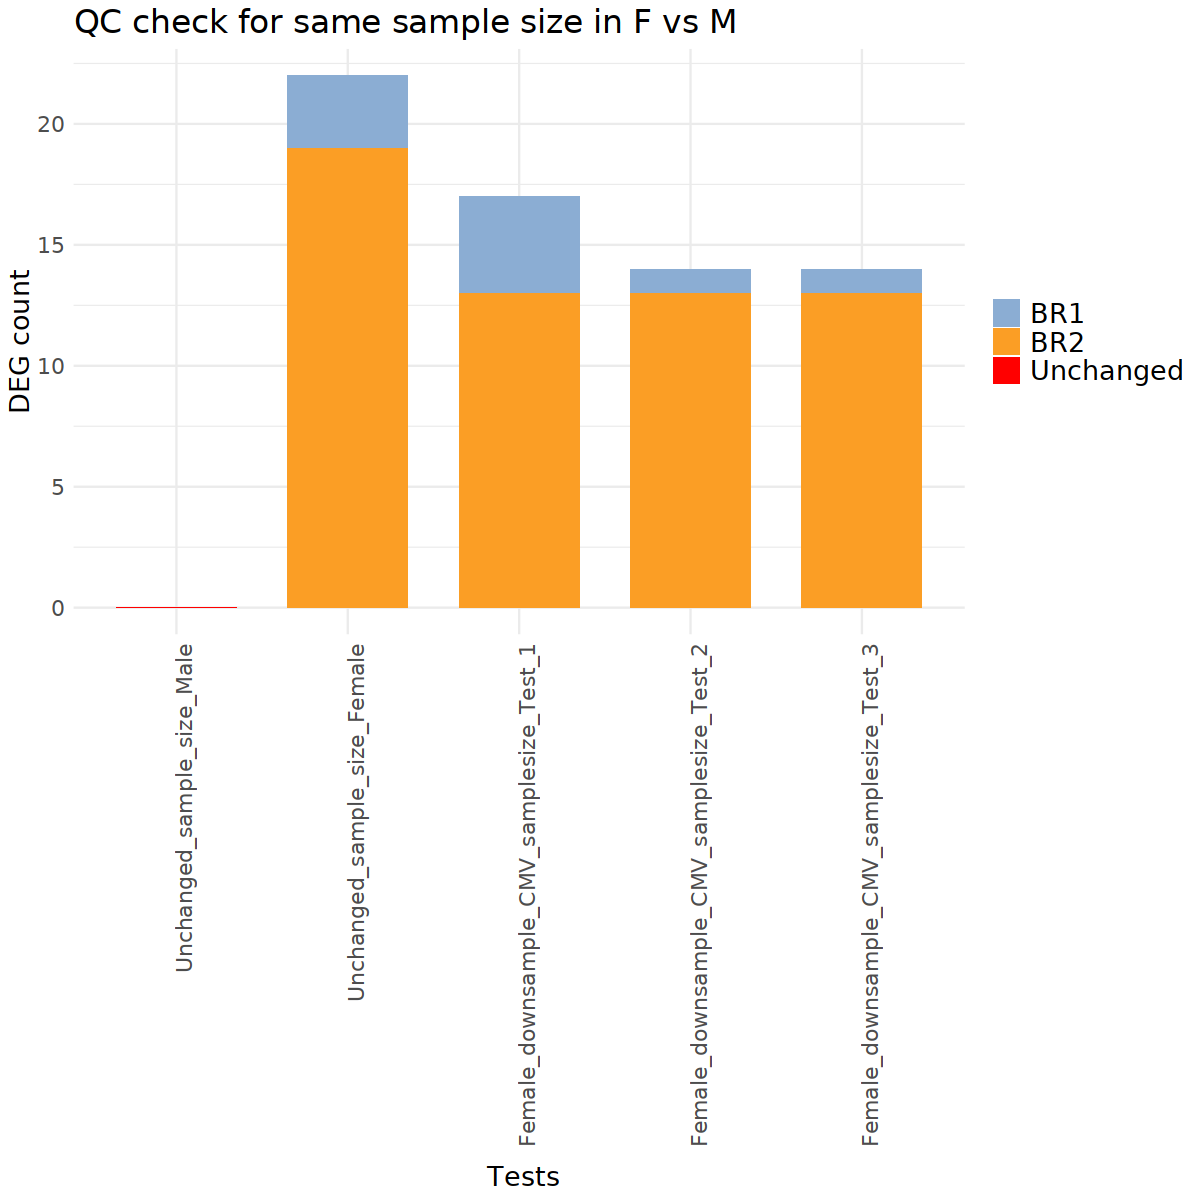

In [445]:
# Custom pastel colors
#Define the desired order for the x-axis
desired_order <- c("Unchanged_sample_size_Male", "Unchanged_sample_size_Female", "Female_downsample_CMV_samplesize_Test_1", "Female_downsample_CMV_samplesize_Test_2", "Female_downsample_CMV_samplesize_Test_3")

# Convert the 'category' variable to a factor with the desired order
freq$test_num <- factor(freq$test_num, levels = desired_order)


pastel_colors <- c("#8BADD3", "#FB9E25", "red" )  # Example pastel colors

options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(freq, aes(x = test_num, y = count, fill = Expression)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = pastel_colors) +  # Set pastel colors
  labs(title = "QC check for same sample size in F vs M", x = "\n Tests", y = "DEG count") +
  theme_minimal() +
  theme(
    text = element_text(size = 16, color = "black"),  # Enlarge text
    axis.text.x = element_text(angle = 90, hjust = 1),  # Rotate x-axis labels
    axis.title = element_text(size = 16),  # Enlarge axis titles
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_text(size = 16)  # Enlarge legend text
  )

## file_list - Core Cd14 mono

In [371]:
# file_list<-list.files(path = paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_3"), pattern = ".csv", all.files = FALSE,
#            full.names = TRUE, recursive = FALSE,
#            ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)

In [372]:
# DEG_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))
# DEG<-do.call(rbind,DEG_list)

In [462]:
DEG_male <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male/Core CD14 monocyte_Y1D0.csv")
DEG_male$test_num <- "Unchanged_sample_size_Male"
#DEG_male

In [480]:
DEG_female <-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Core CD14 monocyte_Y1D0.csv")
DEG_female$test_num <- "Unchanged_sample_size_Female"

In [481]:
# DEG1 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_1/Core CD14 monocyte_Y1D0.csv")
# DEG1$test_num <- "Female_Test_1"

In [482]:
# DEG2 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_2/Core CD14 monocyte_Y1D0.csv")
# DEG2$test_num <- "Female_Test_2"

In [483]:
# DEG3 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_3/Core CD14 monocyte_Y1D0.csv")
# DEG3$test_num <- "Female_Test_3"

In [484]:
DEG_CMV_1 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_1/Core CD14 monocyte_Y1D0.csv")                                  
DEG_CMV_1$test_num <- "Female_downsample_CMV_samplesize_Test_1"

In [485]:
DEG_CMV_2 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_2/Core CD14 monocyte_Y1D0.csv")                                  
DEG_CMV_2$test_num <- "Female_downsample_CMV_samplesize_Test_2"

In [486]:
DEG_CMV_3 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_2/Core CD14 monocyte_Y1D0.csv")                                  
DEG_CMV_3$test_num <- "Female_downsample_CMV_samplesize_Test_3"

In [487]:
# Create a list of data frames
DEG_list <- list(DEG_male, DEG_female, DEG_CMV_1, DEG_CMV_2, DEG_CMV_3 )

# Combine the data frames using do.call and rbind
DEG <- do.call(rbind, DEG_list)


In [488]:
DEG$test_num %>% unique()
DEG$celltype %>% unique()

[1] "Unchanged_sample_size_Male"             
[2] "Unchanged_sample_size_Female"           
[3] "Female_downsample_CMV_samplesize_Test_1"
[4] "Female_downsample_CMV_samplesize_Test_2"
[5] "Female_downsample_CMV_samplesize_Test_3"

[1] "Core CD14 monocyte"

In [489]:
unique(DEG$Direction)

[1] "BR2" "BR1"

In [490]:
DEG<- DEG%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged"))

In [491]:
DEG<-DEG %>% filter(Year=='Y1')
#DEG

In [497]:
freq <- DEG %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
  dplyr::group_by(test_num, Expression) %>%
   dplyr::summarise(count = n())

freq

`summarise()` has grouped output by 'test_num'. You can override using the
`.groups` argument.


test_num,Expression,count
<chr>,<chr>,<int>
Female_downsample_CMV_samplesize_Test_1,BR1,31
Female_downsample_CMV_samplesize_Test_1,BR2,46
Female_downsample_CMV_samplesize_Test_2,BR1,14
Female_downsample_CMV_samplesize_Test_2,BR2,35
Female_downsample_CMV_samplesize_Test_3,BR1,14
Female_downsample_CMV_samplesize_Test_3,BR2,35
Unchanged_sample_size_Female,BR1,38
Unchanged_sample_size_Female,BR2,52
Unchanged_sample_size_Male,BR1,4


In [498]:
#desired_order <- c("Male_Test_0", "Female_Test_0", "Female_Test_1", "Female_Test_2", "Female_Test_3", "Female_CMV_Test_1", "Female_CMV_Test_2", "Female_CMV_Test_3")
desired_order <- c("Unchanged_sample_size_Male", "Unchanged_sample_size_Female", "Female_downsample_CMV_samplesize_Test_1", "Female_downsample_CMV_samplesize_Test_2", "Female_downsample_CMV_samplesize_Test_3")

    # Convert the 'category' variable to a factor with the desired order
freq$test_num <- factor(freq$test_num, levels = desired_order)


freq

test_num,Expression,count
<fct>,<chr>,<int>
Female_downsample_CMV_samplesize_Test_1,BR1,31
Female_downsample_CMV_samplesize_Test_1,BR2,46
Female_downsample_CMV_samplesize_Test_2,BR1,14
Female_downsample_CMV_samplesize_Test_2,BR2,35
Female_downsample_CMV_samplesize_Test_3,BR1,14
Female_downsample_CMV_samplesize_Test_3,BR2,35
Unchanged_sample_size_Female,BR1,38
Unchanged_sample_size_Female,BR2,52
Unchanged_sample_size_Male,BR1,4


In [499]:
# # Add a new row for Male_Test_0 with count 0
# new_row <- data.frame(test_num = "Unchanged_sample_size_Male", Expression = "Unchanged", count = 0)

# # Combine df with the new row
# freq <- bind_rows(freq, new_row)
# freq

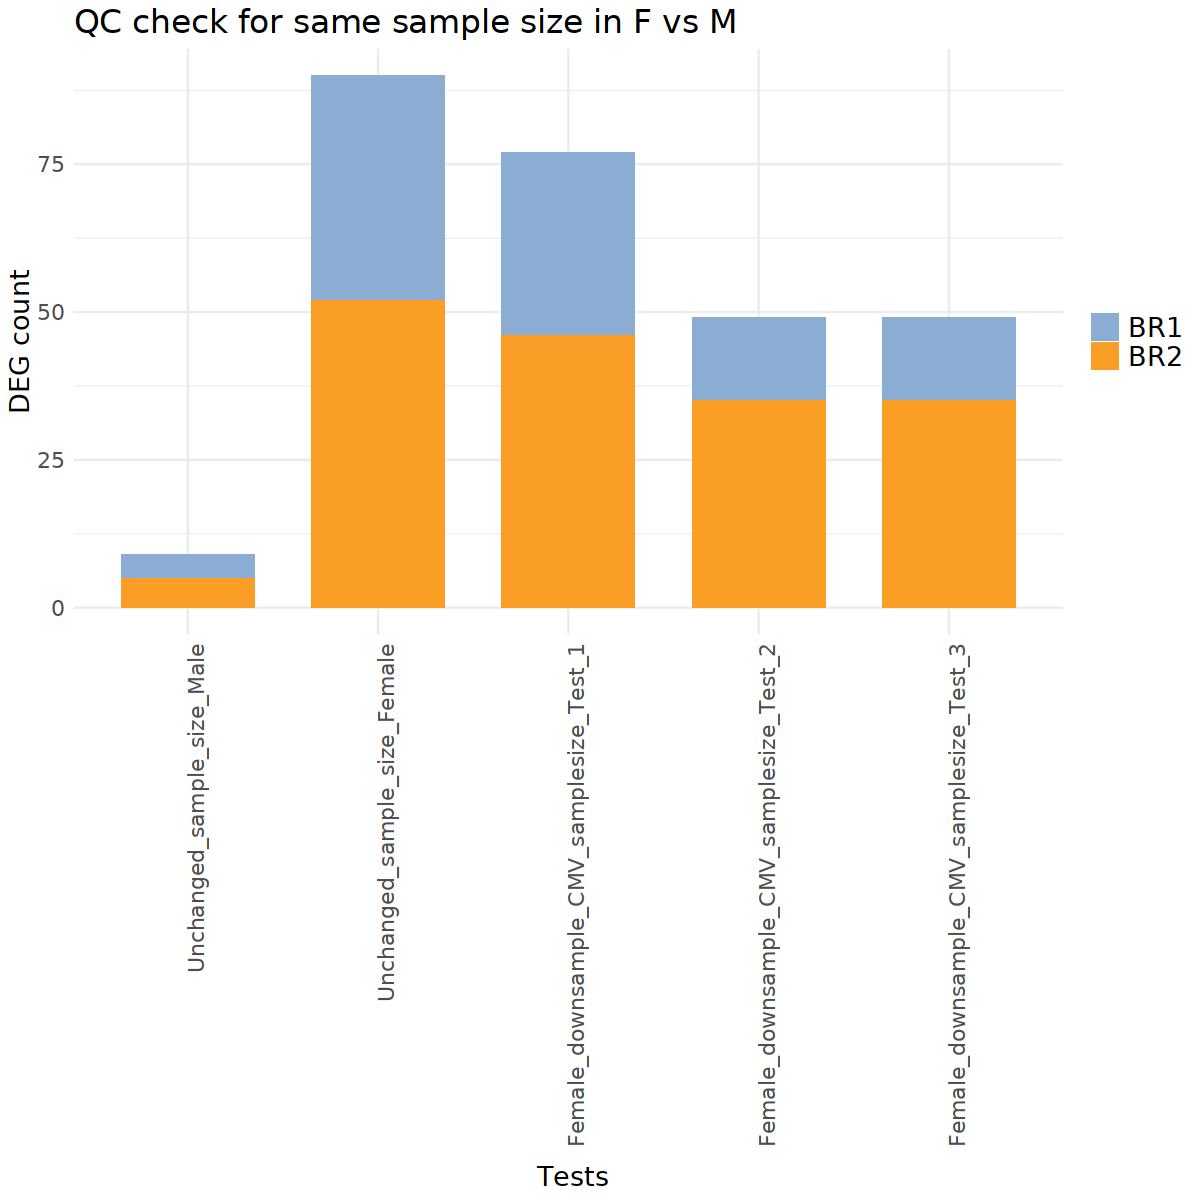

In [500]:
# Custom pastel colors
#Define the desired order for the x-axis
desired_order <- c("Unchanged_sample_size_Male", "Unchanged_sample_size_Female", "Female_downsample_CMV_samplesize_Test_1", "Female_downsample_CMV_samplesize_Test_2", "Female_downsample_CMV_samplesize_Test_3")

# Convert the 'category' variable to a factor with the desired order
freq$test_num <- factor(freq$test_num, levels = desired_order)


pastel_colors <- c("#8BADD3", "#FB9E25", "red" )  # Example pastel colors

options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(freq, aes(x = test_num, y = count, fill = Expression)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = pastel_colors) +  # Set pastel colors
  labs(title = "QC check for same sample size in F vs M", x = "\n Tests", y = "DEG count") +
  theme_minimal() +
  theme(
    text = element_text(size = 16, color = "black"),  # Enlarge text
    axis.text.x = element_text(angle = 90, hjust = 1),  # Rotate x-axis labels
    axis.title = element_text(size = 16),  # Enlarge axis titles
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_text(size = 16)  # Enlarge legend text
  )

## file_list - ISG+ Cd14 mono

In [371]:
# file_list<-list.files(path = paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_3"), pattern = ".csv", all.files = FALSE,
#            full.names = TRUE, recursive = FALSE,
#            ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)

In [372]:
# DEG_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))
# DEG<-do.call(rbind,DEG_list)

In [501]:
DEG_male <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male/ISG+ CD14 monocyte_Y1D0.csv")
DEG_male$test_num <- "Unchanged_sample_size_Male"
#DEG_male

In [502]:
DEG_female <-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/ISG+ CD14 monocyte_Y1D0.csv")
DEG_female$test_num <- "Unchanged_sample_size_Female"

In [503]:
# DEG1 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_1/ISG+ CD14 monocyte_Y1D0.csv")
# DEG1$test_num <- "Female_Test_1"

In [504]:
# DEG2 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_2/ISG+ CD14 monocyte_Y1D0.csv")
# DEG2$test_num <- "Female_Test_2"

In [505]:
# DEG3 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_Test_3/ISG+ CD14 monocyte_Y1D0.csv")
# DEG3$test_num <- "Female_Test_3"

In [506]:
DEG_CMV_1 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_1/ISG+ CD14 monocyte_Y1D0.csv")                                  
DEG_CMV_1$test_num <- "Female_downsample_CMV_samplesize_Test_1"

In [507]:
DEG_CMV_2 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_2/ISG+ CD14 monocyte_Y1D0.csv")                                  
DEG_CMV_2$test_num <- "Female_downsample_CMV_samplesize_Test_2"

In [508]:
DEG_CMV_3 <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female_CMV_Test_2/ISG+ CD14 monocyte_Y1D0.csv")                                  
DEG_CMV_3$test_num <- "Female_downsample_CMV_samplesize_Test_3"

In [509]:
# Create a list of data frames
DEG_list <- list(DEG_male, DEG_female, DEG_CMV_1, DEG_CMV_2, DEG_CMV_3 )

# Combine the data frames using do.call and rbind
DEG <- do.call(rbind, DEG_list)


In [510]:
DEG$test_num %>% unique()
DEG$celltype %>% unique()

[1] "Unchanged_sample_size_Male"             
[2] "Unchanged_sample_size_Female"           
[3] "Female_downsample_CMV_samplesize_Test_1"
[4] "Female_downsample_CMV_samplesize_Test_2"
[5] "Female_downsample_CMV_samplesize_Test_3"

[1] "ISG+ CD14 monocyte"

In [511]:
unique(DEG$Direction)

[1] "BR2" "BR1"

In [512]:
DEG<- DEG%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged"))

In [513]:
DEG<-DEG %>% filter(Year=='Y1')
#DEG

In [514]:
freq <- DEG %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
  dplyr::group_by(test_num, Expression) %>%
   dplyr::summarise(count = n())

freq

`summarise()` has grouped output by 'test_num'. You can override using the
`.groups` argument.


test_num,Expression,count
<chr>,<chr>,<int>
Female_downsample_CMV_samplesize_Test_1,BR1,4
Female_downsample_CMV_samplesize_Test_1,BR2,10
Female_downsample_CMV_samplesize_Test_2,BR1,3
Female_downsample_CMV_samplesize_Test_2,BR2,8
Female_downsample_CMV_samplesize_Test_3,BR1,3
Female_downsample_CMV_samplesize_Test_3,BR2,8
Unchanged_sample_size_Female,BR1,4
Unchanged_sample_size_Female,BR2,13
Unchanged_sample_size_Male,BR1,8


In [515]:
#desired_order <- c("Male_Test_0", "Female_Test_0", "Female_Test_1", "Female_Test_2", "Female_Test_3", "Female_CMV_Test_1", "Female_CMV_Test_2", "Female_CMV_Test_3")
desired_order <- c("Unchanged_sample_size_Male", "Unchanged_sample_size_Female", "Female_downsample_CMV_samplesize_Test_1", "Female_downsample_CMV_samplesize_Test_2", "Female_downsample_CMV_samplesize_Test_3")

    # Convert the 'category' variable to a factor with the desired order
freq$test_num <- factor(freq$test_num, levels = desired_order)


freq

test_num,Expression,count
<fct>,<chr>,<int>
Female_downsample_CMV_samplesize_Test_1,BR1,4
Female_downsample_CMV_samplesize_Test_1,BR2,10
Female_downsample_CMV_samplesize_Test_2,BR1,3
Female_downsample_CMV_samplesize_Test_2,BR2,8
Female_downsample_CMV_samplesize_Test_3,BR1,3
Female_downsample_CMV_samplesize_Test_3,BR2,8
Unchanged_sample_size_Female,BR1,4
Unchanged_sample_size_Female,BR2,13
Unchanged_sample_size_Male,BR1,8


In [516]:
# # Add a new row for Male_Test_0 with count 0
# new_row <- data.frame(test_num = "Unchanged_sample_size_Male", Expression = "Unchanged", count = 0)

# # Combine df with the new row
# freq <- bind_rows(freq, new_row)
# freq

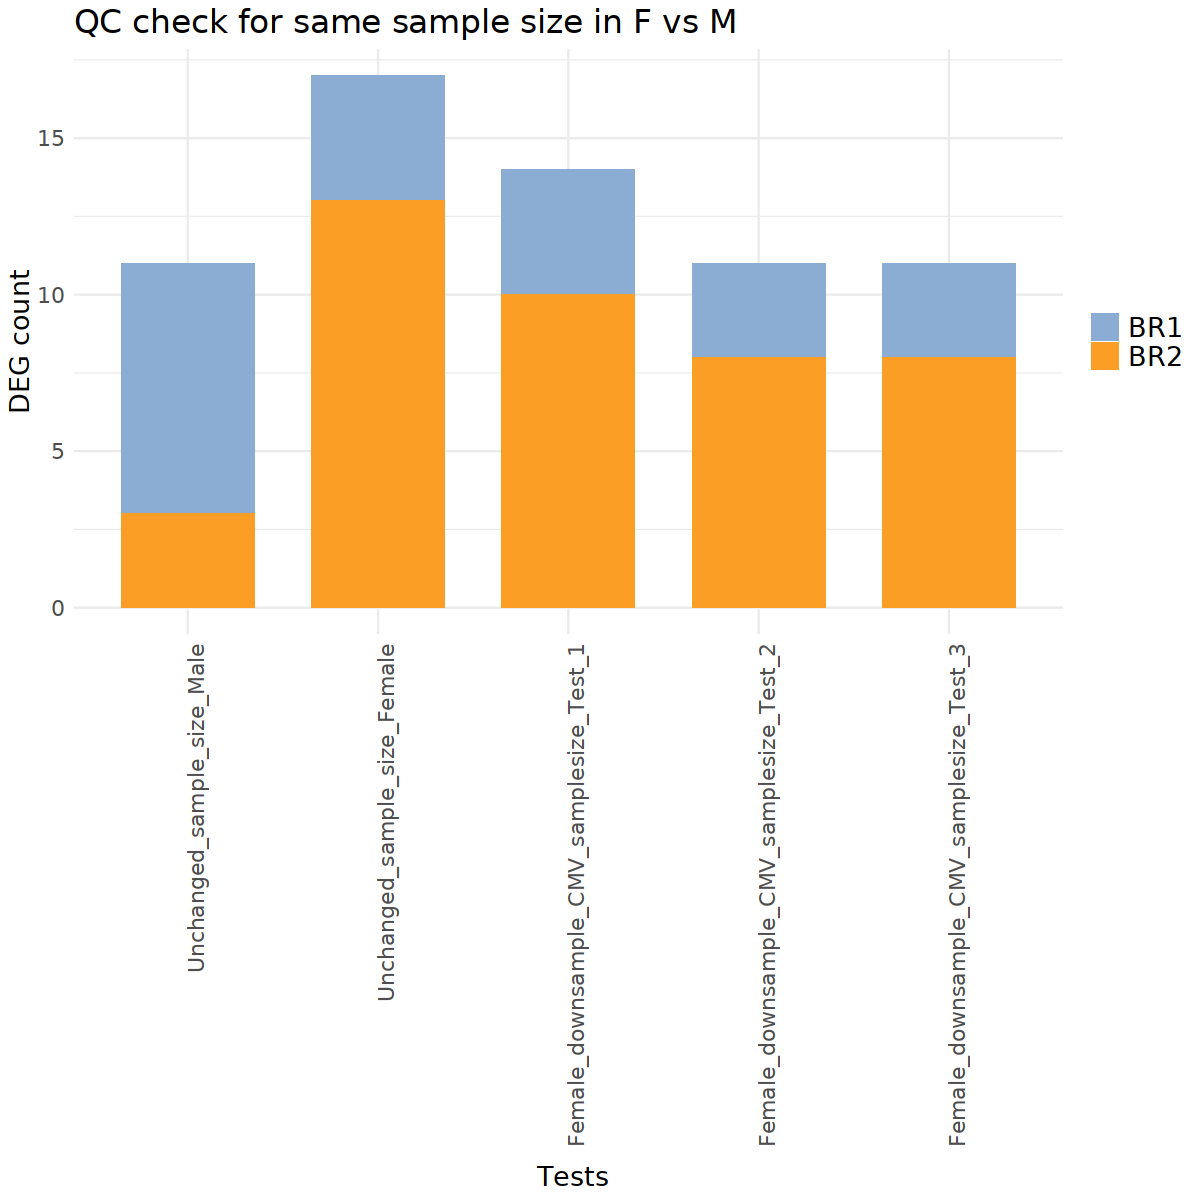

In [517]:
# Custom pastel colors
#Define the desired order for the x-axis
desired_order <- c("Unchanged_sample_size_Male", "Unchanged_sample_size_Female", "Female_downsample_CMV_samplesize_Test_1", "Female_downsample_CMV_samplesize_Test_2", "Female_downsample_CMV_samplesize_Test_3")

# Convert the 'category' variable to a factor with the desired order
freq$test_num <- factor(freq$test_num, levels = desired_order)


pastel_colors <- c("#8BADD3", "#FB9E25", "red" )  # Example pastel colors

options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(freq, aes(x = test_num, y = count, fill = Expression)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = pastel_colors) +  # Set pastel colors
  labs(title = "QC check for same sample size in F vs M", x = "\n Tests", y = "DEG count") +
  theme_minimal() +
  theme(
    text = element_text(size = 16, color = "black"),  # Enlarge text
    axis.text.x = element_text(angle = 90, hjust = 1),  # Rotate x-axis labels
    axis.title = element_text(size = 16),  # Enlarge axis titles
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_text(size = 16)  # Enlarge legend text
  )

In [56]:
# #to change 'down-regulated' to negative values
# freq<-freq %>% mutate (count=case_when(Expression=="Down-regulated in BR2"~-count,TRUE~count))

In [94]:
freq

test_num,Expression,count
<chr>,<chr>,<int>
Female_Test_0,BR1,3
Female_Test_0,BR2,19
Female_Test_1,BR2,4
Female_Test_2,BR1,1
Female_Test_2,BR2,16
Female_Test_3,BR1,2
Female_Test_3,BR2,27


In [100]:
orders<-freq
orders$count<-abs(orders$count)
orders<-orders%>%
  dplyr::group_by(test_num) %>%
  dplyr::summarize(value = sum(count))%>%dplyr::arrange(desc(value)) %>% dplyr::select (test_num) %>% dplyr::pull()

In [102]:
orders

[1] "Female_Test_3" "Female_Test_0" "Female_Test_2" "Female_Test_1"

In [377]:
options(repr.plot.width = 10, repr.plot.height = 5)
#orders<-unique(freq %>% arrange(desc(count)) %>% select (celltype) %>% pull())
freq$celltype<-factor(freq$celltype,levels=orders)
p1<-ggplot(freq, aes(x = celltype, y = count, fill = Expression)) +
  geom_bar(stat = "identity", position = "identity") +theme_bw(base_size=12)+  scale_fill_aaas()+
  labs(x = "celltype", y = "DEG_Counts") +  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15))+guides(fill = guide_legend(reverse = TRUE))+
  ylim(-170,170)

In [109]:
total_gene <- DEG  %>%
  dplyr::group_by(test_num) %>%
  dplyr::summarise(count = n())
total_gene$test_num<-factor(total_gene$test_num,levels=orders)

total_gene

test_num,count
<fct>,<int>
Female_Test_0,6068
Female_Test_1,6068
Female_Test_2,6068
Female_Test_3,6068
NA,6068


In [110]:
p2<-ggplot(total_gene, aes(x = celltype, y = count)) +
  geom_bar(stat = "identity", position = "identity") +
  labs(x = "celltype", y = "Total_Genes_Expressed")+theme_bw(base_size=12)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+ylab('N_Genes')

In [111]:
options(repr.plot.width = 12, repr.plot.height = 8)

p3<-p1 %>% insert_top(p2,height=0.7)

p3



ERROR: Error in insert_top(., p2, height = 0.7): could not find function "insert_top"


# Gather celltype files by DESEQ2 generated for Females only

In [58]:
# gather all the DEG files in Males and Female seperately
data_path = '/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female'

#data_path = '/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male'


In [59]:
# List all files ending with ".csv" in the directory
csv_files <- list.files(data_path, pattern = "\\.csv$", full.names = TRUE)

# Display the list of CSV files
#print(csv_files)

In [60]:
# Create an empty list to store data frames
data_list <- list()

# Loop through each CSV file, read it, and store it in the list
for (file in csv_files) {
  data <- read.csv(file)
  data_list[[file]] <- data
}

In [61]:
#head(data_list)

In [62]:
# Merge all data frames in the list vertically
merged_data_female <- do.call(rbind, data_list)
head(merged_data_female)
dim(merged_data_female)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.1,NOC2L,0.6755194,-0.63391584,0.6433089,-0.98539890,0.3244282,0.999827,Activated memory B cell,BR1,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.2,ISG15,1.0695630,-0.17236999,0.5515123,-0.31254059,0.7546297,0.999827,Activated memory B cell,BR1,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.3,SDF4,0.8391485,-0.10939778,0.5986429,-0.18274296,0.8549997,0.999827,Activated memory B cell,BR1,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.4,B3GALT6,0.4226833,-0.05320132,0.7376413,-0.07212356,0.9425036,0.999827,Activated memory B cell,BR1,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.5,UBE2J2,1.1380289,0.29006213,0.5256330,0.55183395,0.5810621,0.999827,Activated memory B cell,BR2,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.6,INTS11,0.8266093,-0.34363920,0.5741588,-0.59850896,0.5495004,0.999827,Activated memory B cell,BR1,Y1


[1] 372411     10

In [63]:
merged_data_female$type <- "DEGs_Female"

In [64]:
head(merged_data_female)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.1,NOC2L,0.6755194,-0.63391584,0.6433089,-0.98539890,0.3244282,0.999827,Activated memory B cell,BR1,Y1,DEGs_Female
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.2,ISG15,1.0695630,-0.17236999,0.5515123,-0.31254059,0.7546297,0.999827,Activated memory B cell,BR1,Y1,DEGs_Female
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.3,SDF4,0.8391485,-0.10939778,0.5986429,-0.18274296,0.8549997,0.999827,Activated memory B cell,BR1,Y1,DEGs_Female
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.4,B3GALT6,0.4226833,-0.05320132,0.7376413,-0.07212356,0.9425036,0.999827,Activated memory B cell,BR1,Y1,DEGs_Female
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.5,UBE2J2,1.1380289,0.29006213,0.5256330,0.55183395,0.5810621,0.999827,Activated memory B cell,BR2,Y1,DEGs_Female
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/Activated memory B cell_Y1D0.csv.6,INTS11,0.8266093,-0.34363920,0.5741588,-0.59850896,0.5495004,0.999827,Activated memory B cell,BR1,Y1,DEGs_Female


In [65]:
length(unique(merged_data_female$celltype))

[1] 71

# Gather celltype files by DESEQ2 generated for Males only

In [66]:
data_path = '/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2'

In [67]:
# List all files ending with ".csv" in the directory
csv_files <- list.files(data_path, pattern = "\\.csv$", full.names = TRUE)

# Display the list of CSV files
#print(csv_files)

In [68]:
# Create an empty list to store data frames
data_list <- list()

# Loop through each CSV file, read it, and store it in the list
for (file in csv_files) {
  data <- read.csv(file)
  data_list[[file]] <- data
}

In [84]:
#head(data_list)

In [69]:
# Merge all data frames in the list vertically
merged_data_male <- do.call(rbind, data_list)
head(merged_data_male)
dim(merged_data_male)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.1,NOC2L,0.4682601,-0.33564453,0.8327112,-0.40307434,0.6868935,0.9998266,Activated memory B cell,BR1,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.2,ISG15,0.7716756,0.03101969,0.5329482,0.05820395,0.9535862,0.9998266,Activated memory B cell,BR2,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.3,SDF4,0.5631814,0.01246954,0.6510630,0.01915259,0.9847194,0.9998266,Activated memory B cell,BR2,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.4,B3GALT6,0.3151741,0.61845489,0.8779896,0.70439886,0.4811844,0.9998266,Activated memory B cell,BR2,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.5,UBE2J2,0.4517144,0.17761642,0.6528145,0.27207793,0.7855621,0.9998266,Activated memory B cell,BR2,Y1
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.6,INTS11,0.3656259,0.07206422,0.6856389,0.10510521,0.9162923,0.9998266,Activated memory B cell,BR2,Y1


[1] 372411     10

In [70]:
merged_data_male$type <- "DEGs_Male"

In [71]:
head(merged_data_male)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.1,NOC2L,0.4682601,-0.33564453,0.8327112,-0.40307434,0.6868935,0.9998266,Activated memory B cell,BR1,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.2,ISG15,0.7716756,0.03101969,0.5329482,0.05820395,0.9535862,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.3,SDF4,0.5631814,0.01246954,0.6510630,0.01915259,0.9847194,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.4,B3GALT6,0.3151741,0.61845489,0.8779896,0.70439886,0.4811844,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.5,UBE2J2,0.4517144,0.17761642,0.6528145,0.27207793,0.7855621,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.6,INTS11,0.3656259,0.07206422,0.6856389,0.10510521,0.9162923,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male


In [72]:
length(unique(merged_data_male$celltype))

[1] 71

In [73]:
#quick check
# Unique celltypes in each data frame
unique_celltypes_df1 <- unique(merged_data_female$celltype)
unique_celltypes_df2 <- unique(merged_data_male$celltype)

# Celltypes common to both data frames
common_celltypes <- intersect(unique_celltypes_df1, unique_celltypes_df2)

# Celltypes unique to each data frame
unique_celltypes_df1_only <- setdiff(unique_celltypes_df1, unique_celltypes_df2)
unique_celltypes_df2_only <- setdiff(unique_celltypes_df2, unique_celltypes_df1)

# Print results
cat("Common celltypes:", common_celltypes, "\n")
cat("Unique to df1:", unique_celltypes_df1_only, "\n")
cat("Unique to df2:", unique_celltypes_df2_only, "\n")

Common celltypes: Activated memory B cell Adaptive NK cell ASDC BaEoMaP cell C1Q+ CD16 monocyte CD14+ cDC2 CD27- effector B cell CD27+ effector B cell CD4 MAIT CD56bright NK cell CD8 MAIT CD8aa CD95 memory B cell cDC1 CLP cell CM CD4 T cell CM CD8 T cell CMP cell Core CD14 monocyte Core CD16 monocyte Core memory B cell Core naive B cell Core naive CD4 T cell Core naive CD8 T cell  DN T cell Early memory B cell Erythrocyte GZMB- CD27- EM CD4 T cell GZMB- CD27+ EM CD4 T cell GZMB+ Vd2 gdT GZMK- CD27+ EM CD8 T cell GZMK- CD56dim NK cell GZMK+ CD27+ EM CD8 T cell GZMK+ CD56dim NK cell GZMK+ memory CD4 Treg GZMK+ Vd2 gdT HLA-DRhi cDC2 IL1B+ CD14 monocyte ILC Intermediate monocyte ISG+ CD14 monocyte ISG+ CD16 monocyte ISG+ CD56dim NK cell ISG+ cDC2 ISG+ MAIT ISG+ memory CD4 T cell ISG+ memory CD8 T cell ISG+ naive B cell ISG+ naive CD4 T cell ISG+ naive CD8 T cell KLRB1+ memory CD4 Treg KLRB1+ memory CD8 Treg KLRF1- effector Vd1 gdT KLRF1- GZMB+ CD27- EM CD8 T cell KLRF1- GZMB+ CD27- memory 

# Get DEG counts from combined male and female DEG lists

In [98]:
# Merge both female and Male DEG files, # Merge the two data frames vertically
master <-rbind(merged_data_male, merged_data_female)

In [100]:
head(master)
dim(master)
length(unique(master$celltype))

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.1,NOC2L,0.4682601,-0.33564453,0.8327112,-0.40307434,0.6868935,0.9998266,Activated memory B cell,BR1,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.2,ISG15,0.7716756,0.03101969,0.5329482,0.05820395,0.9535862,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.3,SDF4,0.5631814,0.01246954,0.6510630,0.01915259,0.9847194,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.4,B3GALT6,0.3151741,0.61845489,0.8779896,0.70439886,0.4811844,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.5,UBE2J2,0.4517144,0.17761642,0.6528145,0.27207793,0.7855621,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.6,INTS11,0.3656259,0.07206422,0.6856389,0.10510521,0.9162923,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male


[1] 744822     11

[1] 71

In [76]:
library(dplyr)

In [77]:
master<- master%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged"))

In [78]:
master<-master %>% filter(Year=='Y1')
#DEG

In [163]:
# freq <- master %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
#                                                      log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
#                                                      TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
#   dplyr::group_by(celltype, type) %>%
#    dplyr::summarise(count = n())

In [162]:
# freq
# dim(freq)
# length(unique(freq$celltype))

In [79]:
master_2 <- master %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
    dplyr::group_by(celltype, Direction, type) %>%
    dplyr::summarise(count = n())



`summarise()` has grouped output by 'celltype', 'Direction'. You can override
using the `.groups` argument.


In [81]:
master_2
length(unique(master_2$celltype))

celltype,Direction,type,count
<chr>,<chr>,<chr>,<int>
Adaptive NK cell,BR2,DEGs_Male,1
C1Q+ CD16 monocyte,BR1,DEGs_Male,1
C1Q+ CD16 monocyte,BR2,DEGs_Female,1
CD27+ effector B cell,BR2,DEGs_Female,1
CD27- effector B cell,BR1,DEGs_Female,2
CD27- effector B cell,BR2,DEGs_Female,1
CD27- effector B cell,BR2,DEGs_Male,2
CD4 MAIT,BR1,DEGs_Male,1
CD8 MAIT,BR1,DEGs_Female,1


[1] 38

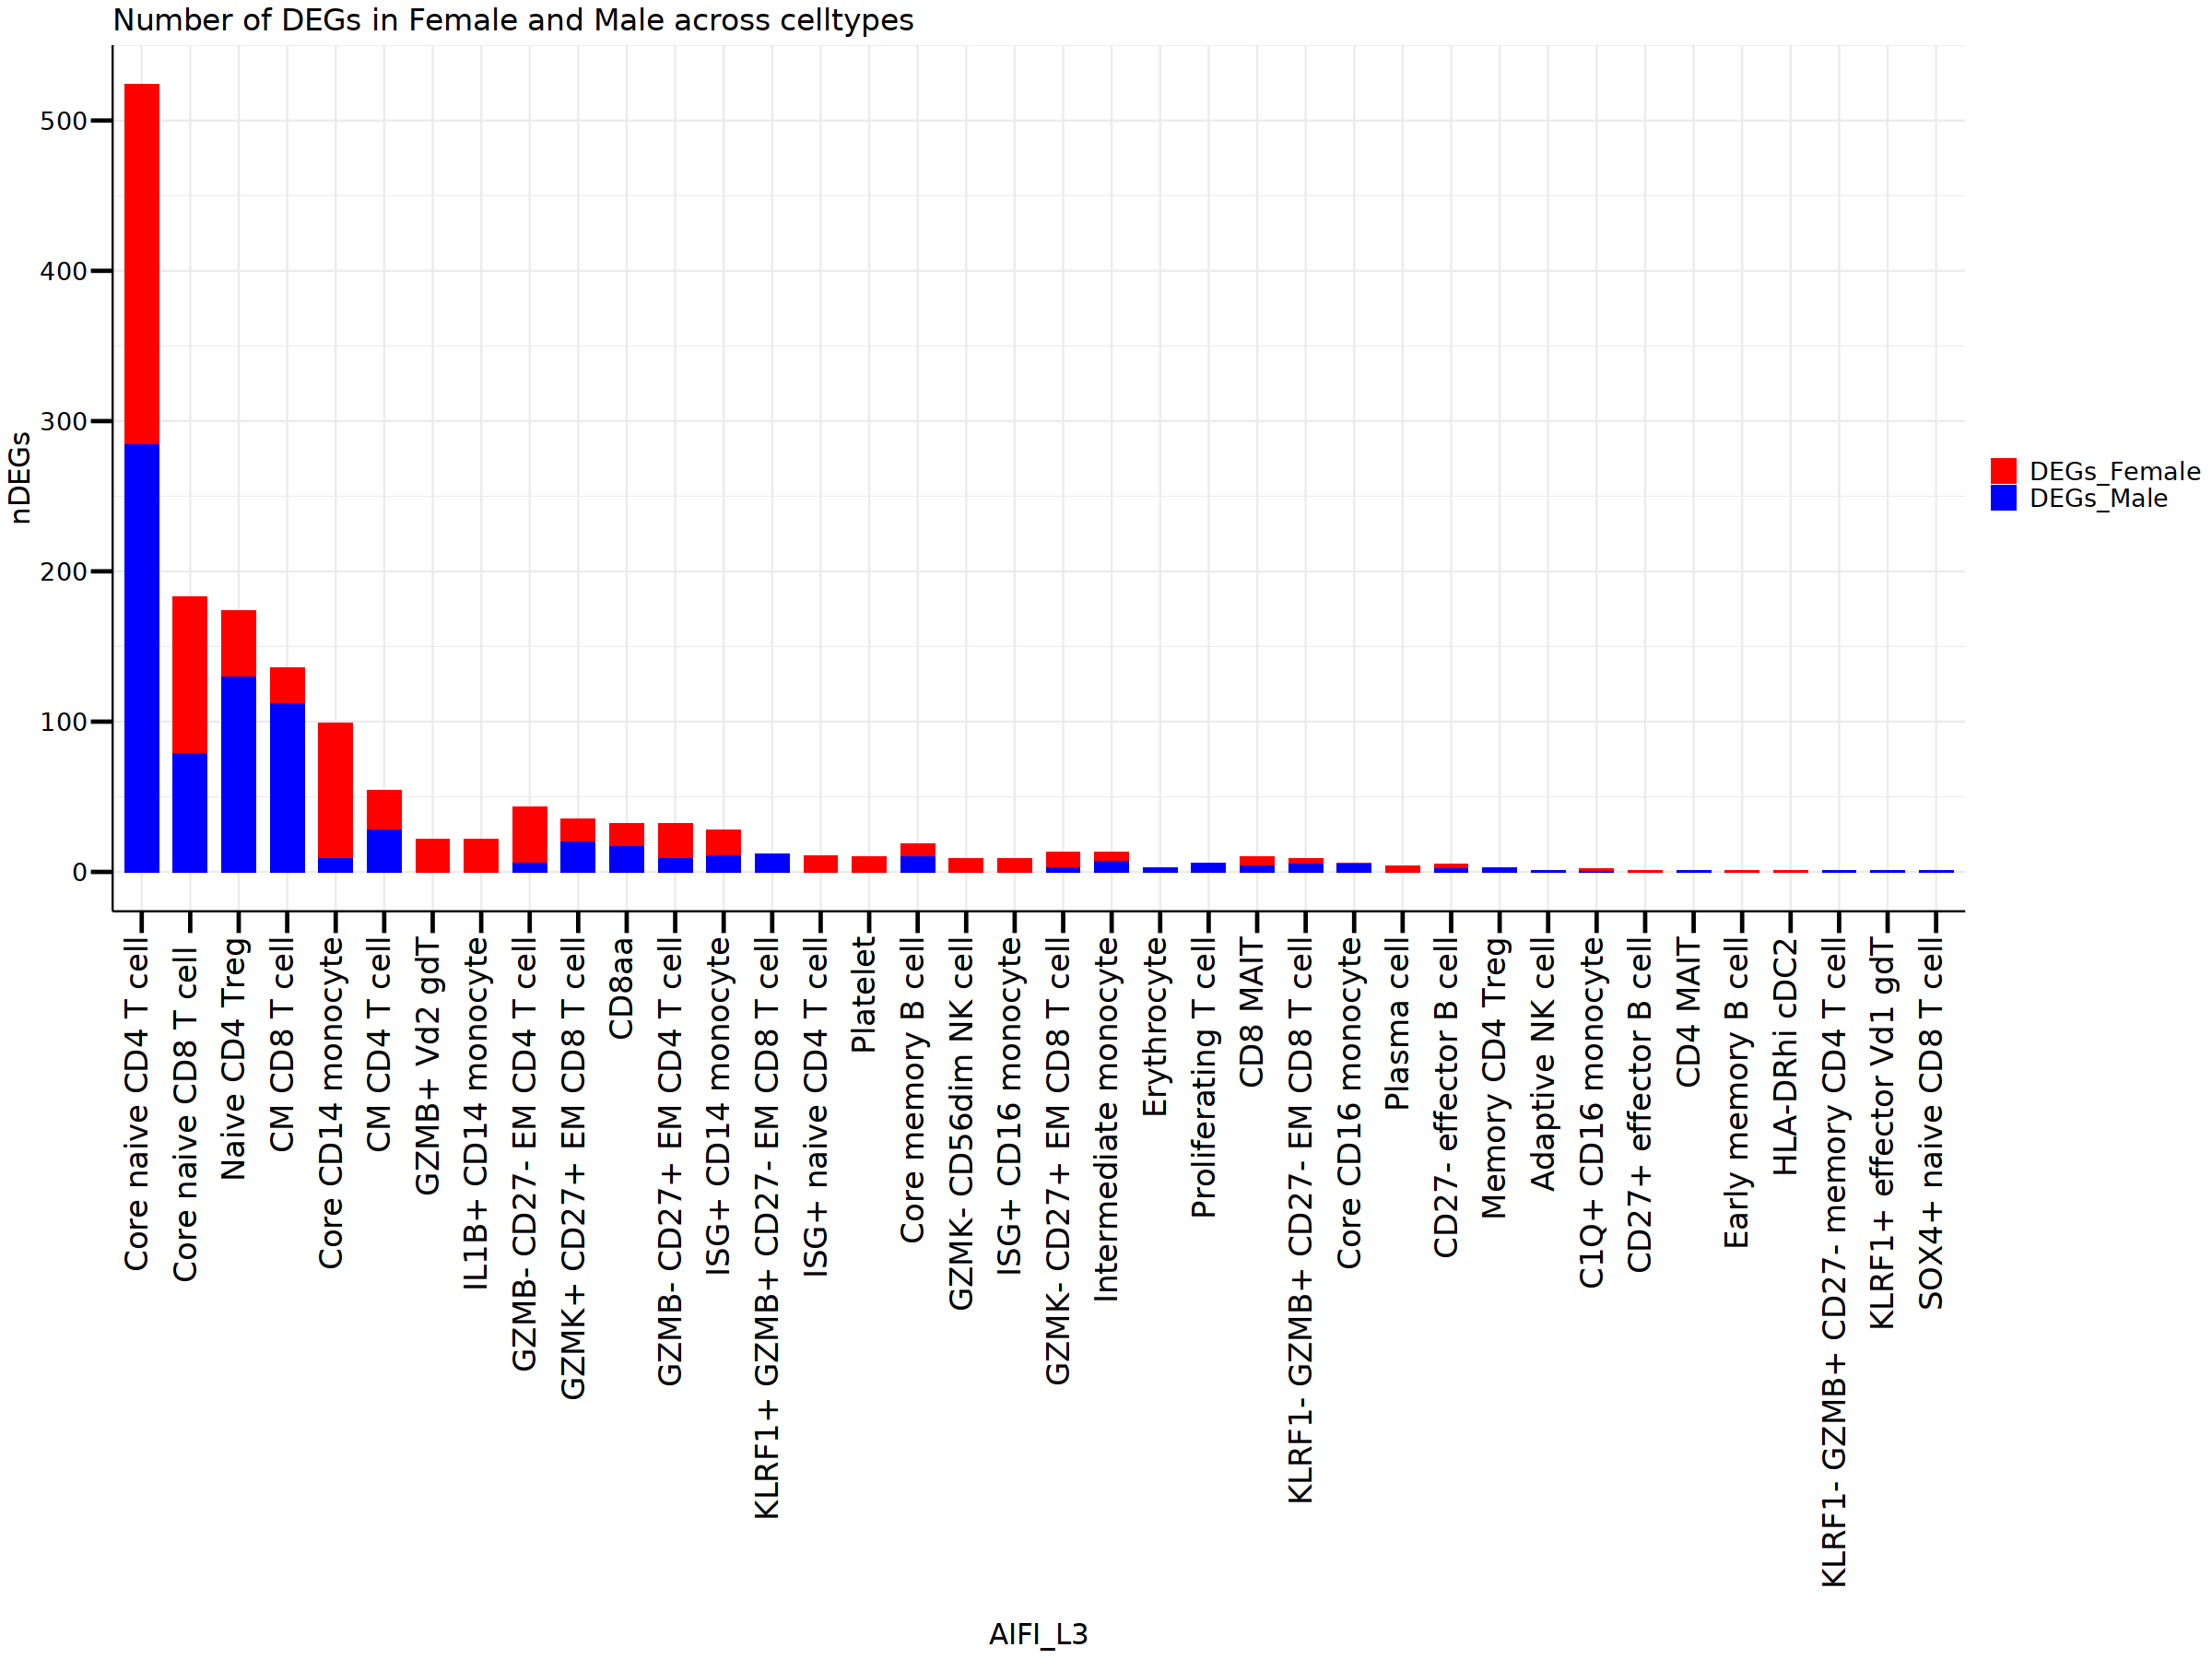

In [82]:
# Custom pastel colors
# #Define the desired order for the x-axis
# desired_order <- c("Unchanged_sample_size_Male", "Unchanged_sample_size_Female", "Female_downsample_CMV_samplesize_Test_1", "Female_downsample_CMV_samplesize_Test_2", "Female_downsample_CMV_samplesize_Test_3")

# # Convert the 'category' variable to a factor with the desired order
# freq$test_num <- factor(freq$test_num, levels = desired_order)


pastel_colors <- c( "red", "blue" )  # Example pastel colors


options(repr.plot.width = 20, repr.plot.height = 15)

ggplot(master_2, aes(x = reorder(celltype, desc(count)), y = count, fill = type)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = pastel_colors) +  # Set pastel colors
  labs(title = "Number of DEGs in Female and Male across celltypes", x = "\nAIFI_L3", y = "nDEGs") +
  theme_minimal() +
  theme(
    text = element_text(size = 16, color = "black"),  # Enlarge text
    axis.text.x = element_text(size = 20, angle = 90, hjust = 1, color = "black", vjust= 0.25),  # Rotate x-axis labels
    axis.text.y = element_text(size = 16, color = "black"),
    axis.title = element_text(size = 18, color = "black"),  # Enlarge axis titles
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_text(size = 16),  # Enlarge legend text
    axis.ticks = element_line(color = 1,linewidth = 1),
    axis.line = element_line(colour = "black", 
                      size = 0.5, linewidth = "solid"),# Set length of ticks
    axis.ticks.length  = unit(0.5, "cm")
  ) 
 
  #ylim(0, 600)  # Limit y-axis range


# subset of celltype (n=13)- zoom in of main


In [83]:
# Merge both female and Male DEG files, # Merge the two data frames vertically
master <-rbind(merged_data_male, merged_data_female)

In [84]:
head(master)
dim(master)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.1,NOC2L,0.4682601,-0.33564453,0.8327112,-0.40307434,0.6868935,0.9998266,Activated memory B cell,BR1,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.2,ISG15,0.7716756,0.03101969,0.5329482,0.05820395,0.9535862,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.3,SDF4,0.5631814,0.01246954,0.6510630,0.01915259,0.9847194,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.4,B3GALT6,0.3151741,0.61845489,0.8779896,0.70439886,0.4811844,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.5,UBE2J2,0.4517144,0.17761642,0.6528145,0.27207793,0.7855621,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Male_v2/Activated memory B cell_Y1D0.csv.6,INTS11,0.3656259,0.07206422,0.6856389,0.10510521,0.9162923,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male


[1] 744822     11

In [85]:
master<- master%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged"))

In [86]:
master<-master %>% filter(Year=='Y1')
#DEG

In [87]:
freq <- master %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
  dplyr::group_by(celltype, type) %>%
   dplyr::summarise(count = n())

`summarise()` has grouped output by 'celltype'. You can override using the
`.groups` argument.


In [88]:
freq
dim(freq)
length(unique(freq$celltype))

celltype,type,count
<chr>,<chr>,<int>
Adaptive NK cell,DEGs_Male,1
C1Q+ CD16 monocyte,DEGs_Female,1
C1Q+ CD16 monocyte,DEGs_Male,1
CD27+ effector B cell,DEGs_Female,1
CD27- effector B cell,DEGs_Female,3
CD27- effector B cell,DEGs_Male,2
CD4 MAIT,DEGs_Male,1
CD8 MAIT,DEGs_Female,6
CD8 MAIT,DEGs_Male,4


[1] 57  3

[1] 38

In [89]:
filtered<- master %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "BR2",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "BR1",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
  dplyr::group_by(celltype) %>%
   dplyr::summarise(count = n())

filtered

celltype,count
<chr>,<int>
Adaptive NK cell,1
C1Q+ CD16 monocyte,2
CD27+ effector B cell,1
CD27- effector B cell,5
CD4 MAIT,1
CD8 MAIT,10
CD8aa,32
CM CD4 T cell,54
CM CD8 T cell,136


In [90]:
top_filt <- filtered %>% filter(filtered$count >=20)
length(unique(top_filt$celltype))

[1] 13

In [91]:
# top_cell <- list(top_filt$celltype)
# top_cell

In [92]:
insert_fig <- left_join(top_filt, freq,  by= "celltype")

In [93]:
insert_fig
length(unique(insert_fig$celltype))

celltype,count.x,type,count.y
<chr>,<int>,<chr>,<int>
CD8aa,32,DEGs_Female,15
CD8aa,32,DEGs_Male,17
CM CD4 T cell,54,DEGs_Female,26
CM CD4 T cell,54,DEGs_Male,28
CM CD8 T cell,136,DEGs_Female,24
CM CD8 T cell,136,DEGs_Male,112
Core CD14 monocyte,99,DEGs_Female,90
Core CD14 monocyte,99,DEGs_Male,9
Core naive CD4 T cell,524,DEGs_Female,240


[1] 13

In [94]:
# Assuming your data frame is named df and you want to remove the column named "column_to_remove"
insert_fig <- subset(insert_fig, select = -count.x)
head(insert_fig)

celltype,type,count.y
<chr>,<chr>,<int>
CD8aa,DEGs_Female,15
CD8aa,DEGs_Male,17
CM CD4 T cell,DEGs_Female,26
CM CD4 T cell,DEGs_Male,28
CM CD8 T cell,DEGs_Female,24
CM CD8 T cell,DEGs_Male,112


In [95]:
head(insert_fig)

celltype,type,count.y
<chr>,<chr>,<int>
CD8aa,DEGs_Female,15
CD8aa,DEGs_Male,17
CM CD4 T cell,DEGs_Female,26
CM CD4 T cell,DEGs_Male,28
CM CD8 T cell,DEGs_Female,24
CM CD8 T cell,DEGs_Male,112


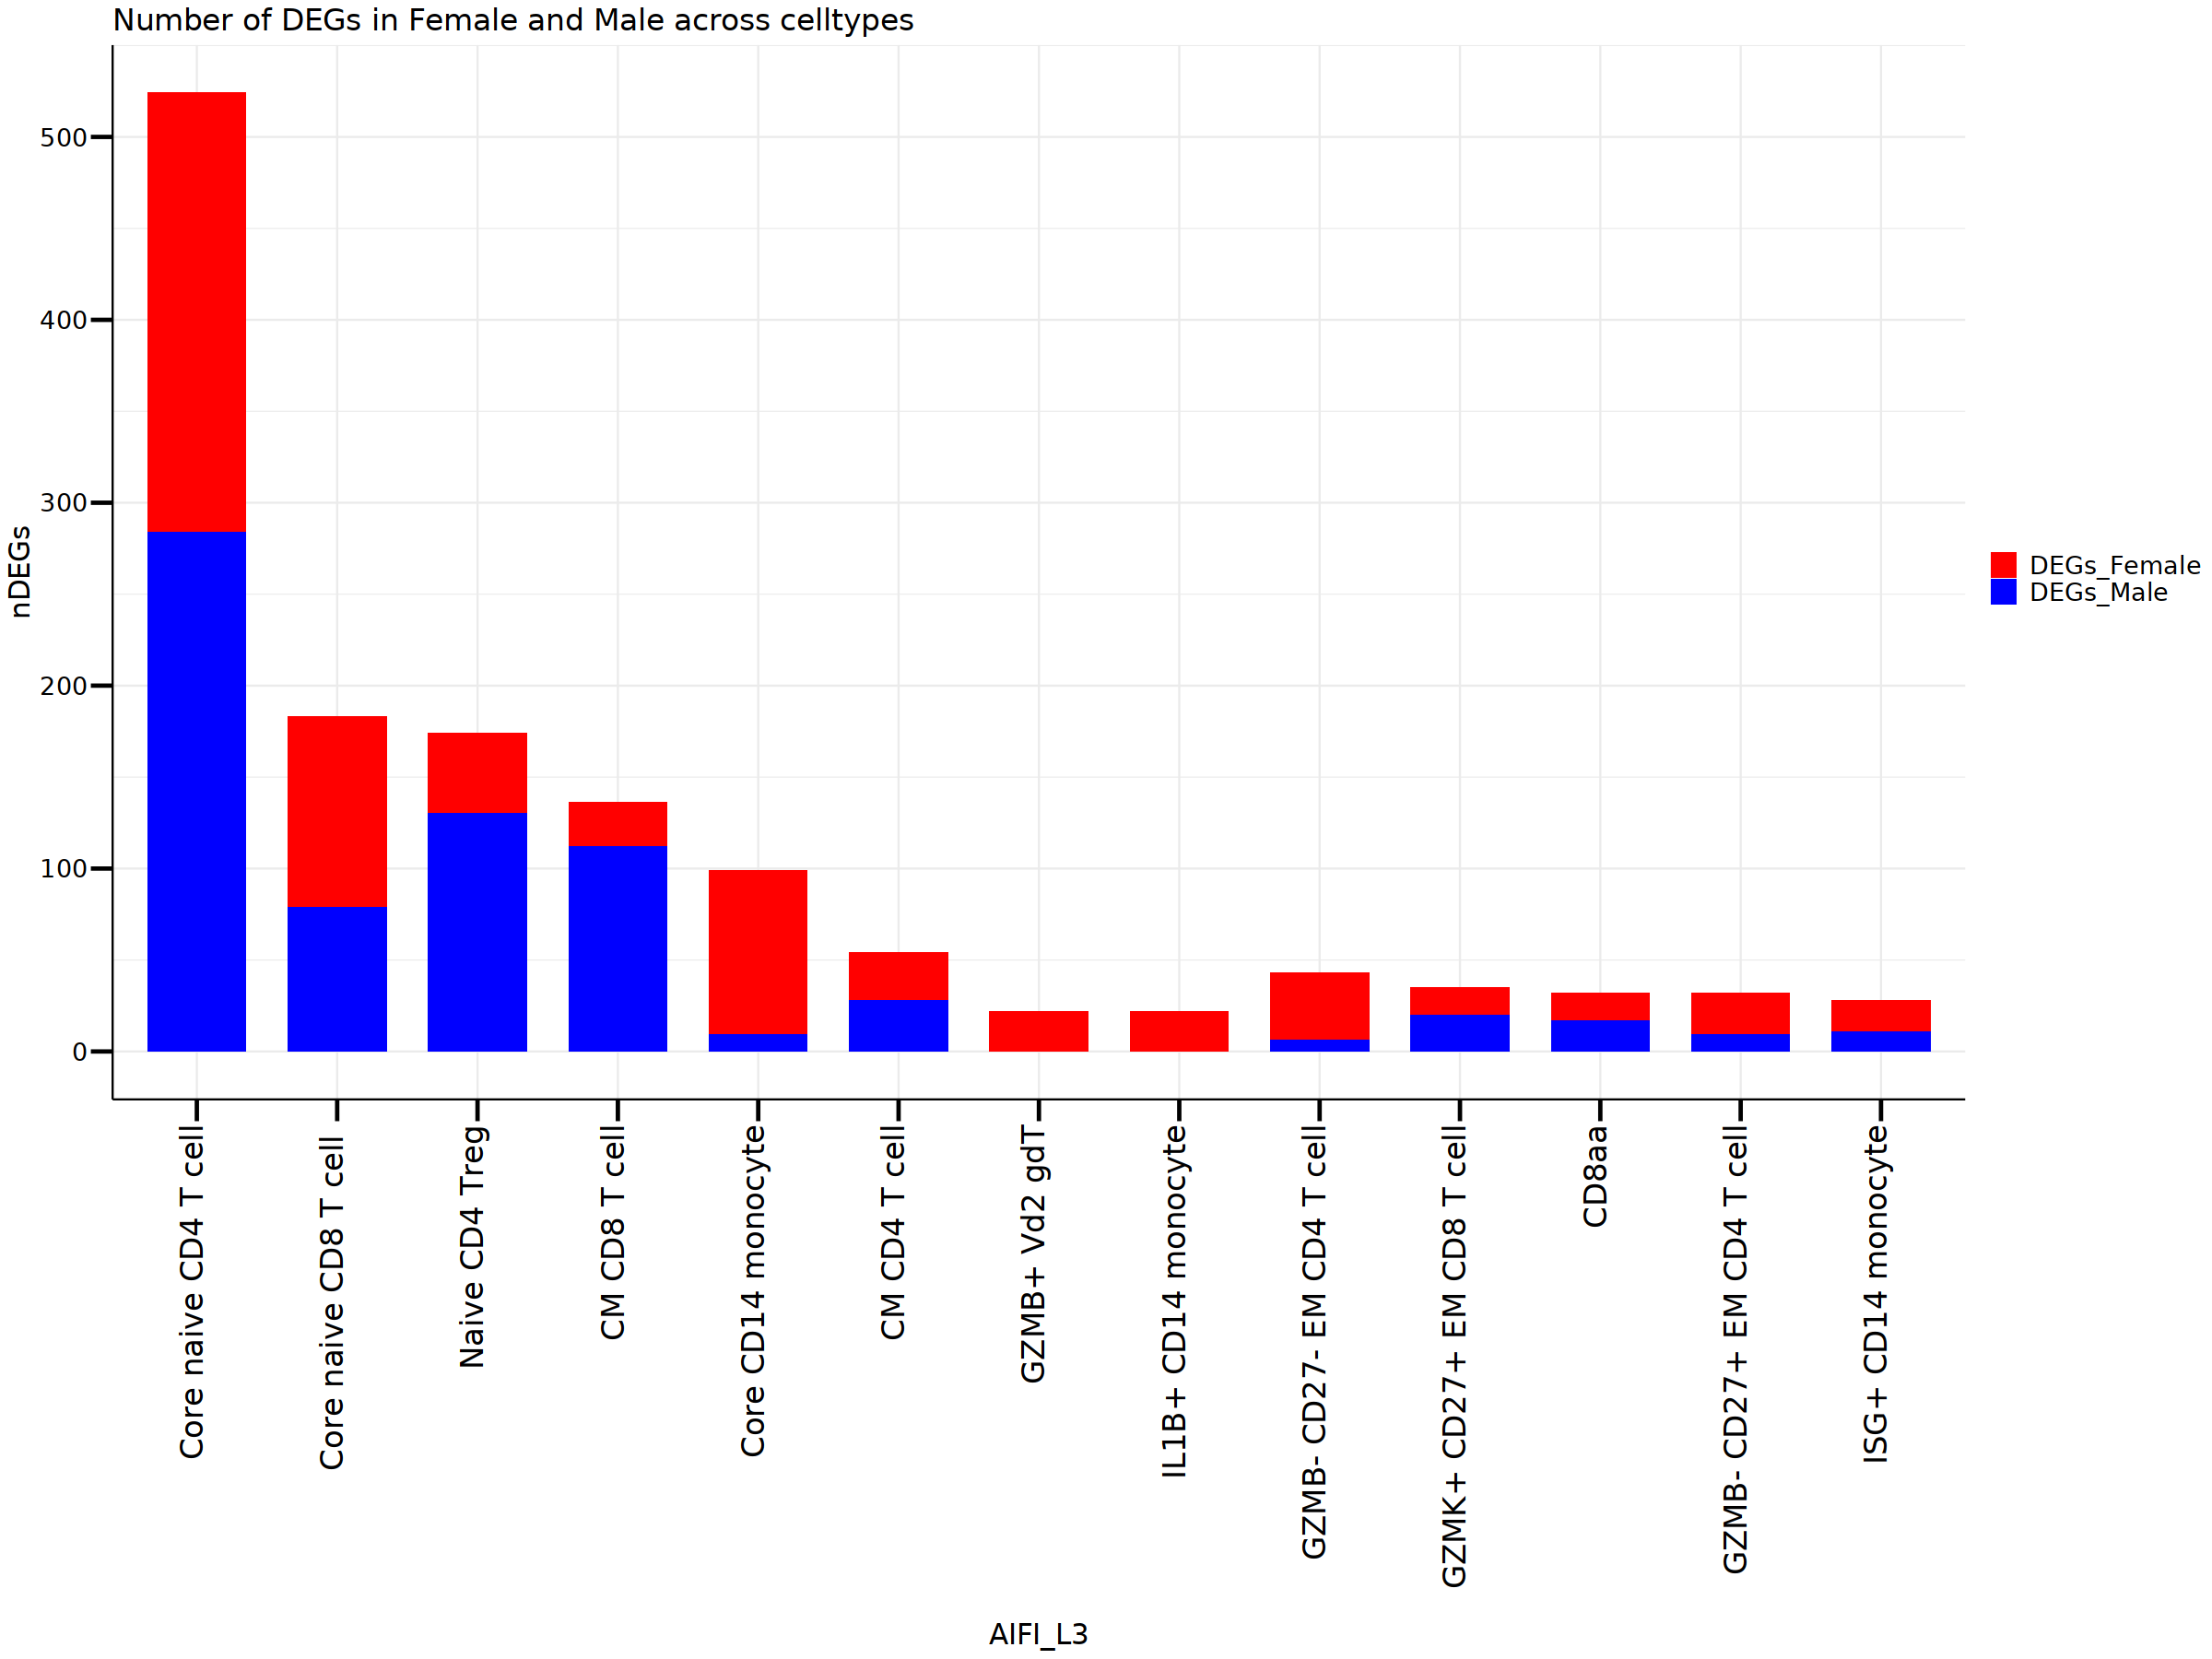

In [96]:
# Custom pastel colors
# #Define the desired order for the x-axis
# desired_order <- c("Unchanged_sample_size_Male", "Unchanged_sample_size_Female", "Female_downsample_CMV_samplesize_Test_1", "Female_downsample_CMV_samplesize_Test_2", "Female_downsample_CMV_samplesize_Test_3")

# # Convert the 'category' variable to a factor with the desired order
# freq$test_num <- factor(freq$test_num, levels = desired_order)


pastel_colors <- c( "red", "blue" )  # Example pastel colors


options(repr.plot.width = 20, repr.plot.height = 15)

ggplot(insert_fig, aes(x = reorder(celltype, desc(count.y)), y = count.y, fill = type)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = pastel_colors) +  # Set pastel colors
  labs(title = "Number of DEGs in Female and Male across celltypes", x = "\nAIFI_L3", y = "nDEGs") +
  theme_minimal() +
  theme(
    text = element_text(size = 16, color = "black"),  # Enlarge text
    axis.text.x = element_text(size = 20, angle = 90, hjust = 1, color = "black", vjust= 0.25),  # Rotate x-axis labels
    axis.text.y = element_text(size = 16, color = "black"),
    axis.title = element_text(size = 18, color = "black"),  # Enlarge axis titles
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_text(size = 16),  # Enlarge legend text
    axis.ticks = element_line(color = 1,linewidth = 1),
    axis.line = element_line(colour = "black", 
                      size = 0.5, linewidth = "solid"),# Set length of ticks
    axis.ticks.length  = unit(0.5, "cm")
  ) 
 
  #ylim(0, 600)  # Limit y-axis range


# Insert Figure

## using jaccard index code

In [51]:
J_index <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/JaccardIndex_FvsM_v6.csv")

In [52]:
J_index

cell_type,jaccard_index,total_DEGs_male,total_DEGs_female,common_DEGs_count
<chr>,<dbl>,<int>,<int>,<int>
Adaptive NK cell,0.00000000,1,0,0
ASDC,NA,0,0,0
BaEoMaP cell,NA,0,0,0
C1Q+ CD16 monocyte,0.00000000,1,1,0
CD14+ cDC2,NA,0,0,0
CD27- effector B cell,0.00000000,2,3,0
CD27+ effector B cell,0.00000000,0,1,0
CD4 MAIT,0.00000000,1,0,0
CD56bright NK cell,NA,0,0,0


In [53]:
#Use DEG# in female/ DEG# (Female+Male-shared) on Y-axis and rank from high to low 
#     in X-axis in cell types that  have total DEGs # (f+M-s) > 10

In [54]:


J_index_modi <- J_index %>%
  mutate(Union = total_DEGs_female + total_DEGs_male - common_DEGs_count,
         Ratio_union = total_DEGs_female / Union,
        Unique_F_ratio = (total_DEGs_female-common_DEGs_count)/ Union)
         

# Print the updated dataframe
print(J_index_modi)


                              cell_type jaccard_index total_DEGs_male
1                      Adaptive NK cell    0.00000000               1
2                                  ASDC            NA               0
3                          BaEoMaP cell            NA               0
4                    C1Q+ CD16 monocyte    0.00000000               1
5                            CD14+ cDC2            NA               0
6                 CD27- effector B cell    0.00000000               2
7                 CD27+ effector B cell    0.00000000               0
8                              CD4 MAIT    0.00000000               1
9                    CD56bright NK cell            NA               0
10                             CD8 MAIT    0.11111111               4
11                                CD8aa    0.00000000              17
12                   CD95 memory B cell            NA               0
13                                 cDC1            NA               0
14                  

In [56]:
new_JI <- J_index_modi %>% filter(J_index_modi$Union > 10)
head(new_JI)

,cell_type,jaccard_index,total_DEGs_male,total_DEGs_female,common_DEGs_count,Union,Ratio_union,Unique_F_ratio
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,CD8aa,0.00000000,17,15,0,32,0.4687500,0.4687500
2,CM CD4 T cell,0.03846154,28,26,2,52,0.5000000,0.4615385
3,CM CD8 T cell,0.04580153,113,24,6,131,0.1832061,0.1374046
4,Core CD14 monocyte,0.01020408,9,90,1,98,0.9183673,0.9081633
5,Core memory B cell,0.05555556,10,9,1,18,0.5000000,0.4444444
6,Core naive CD4 T cell,0.16702355,291,254,78,467,0.5438972,0.3768737


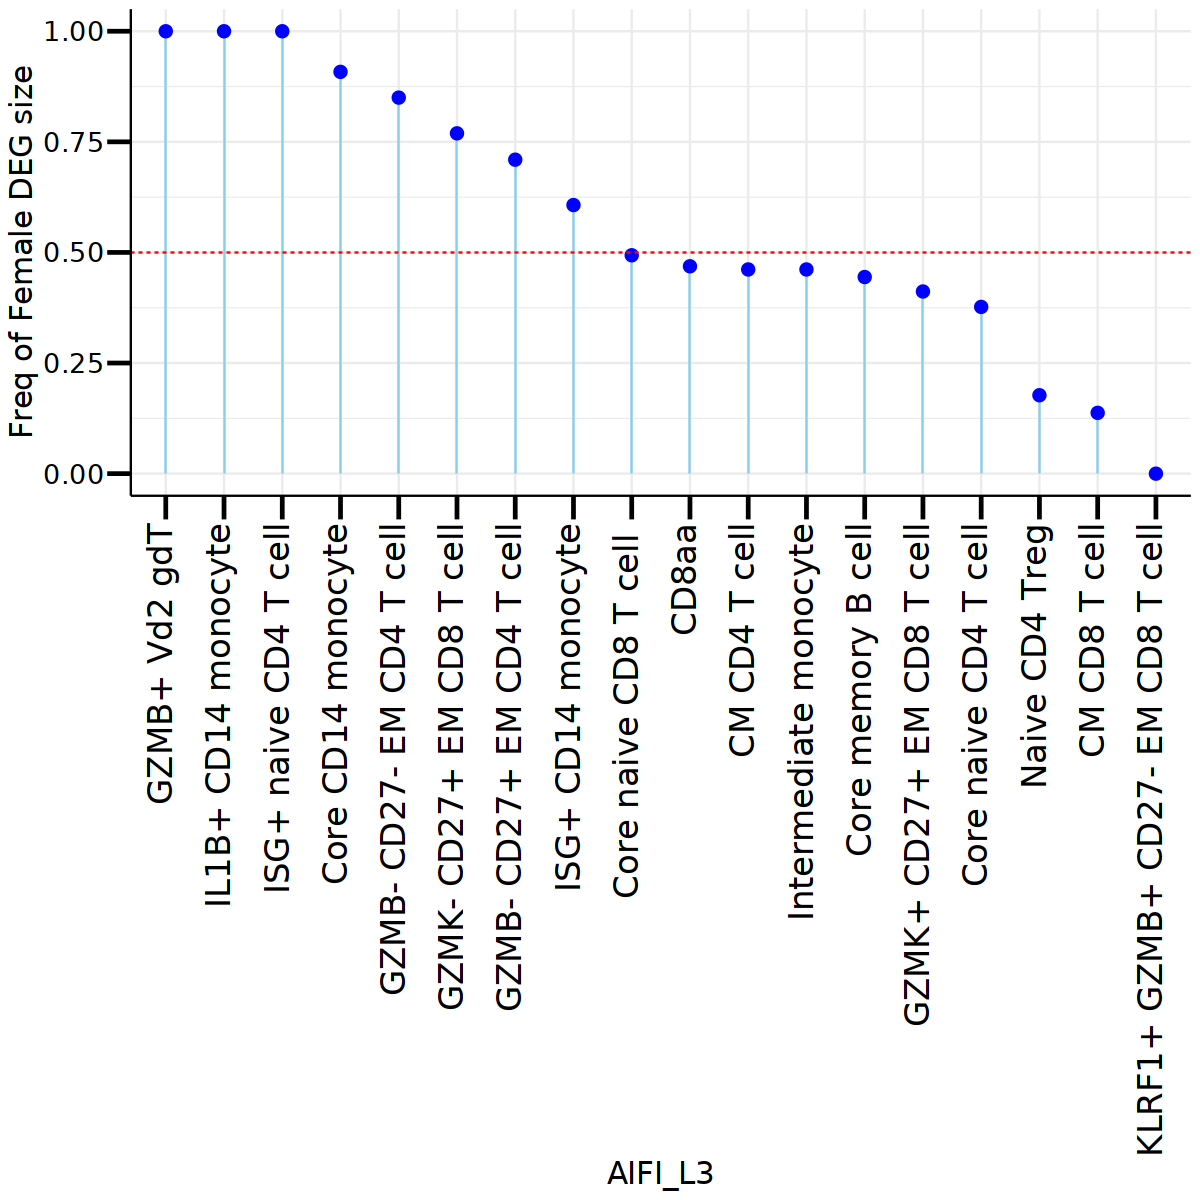

In [57]:
library(ggplot2)

# Assuming your dataframe is named df
# Replace df with the actual name of your dataframe if different

# Sort dataframe by Data_y in descending order
new_JI <- new_JI[order(-new_JI$Unique_F_ratio),]

# Convert cell_type to factor with levels arranged in descending order
new_JI$cell_type <- factor(new_JI$cell_type, levels = new_JI$cell_type)

options(repr.plot.width = 10, repr.plot.height = 10)
# Create lollipop plot
lollipop_plot <- ggplot(new_JI, aes(x = cell_type, y = Unique_F_ratio)) +
  geom_segment(aes(x = cell_type, xend = cell_type, y = 0, yend = Unique_F_ratio), color = "skyblue") +
  geom_point(color = "blue", size = 3) +
   geom_hline(yintercept = 0.5, linetype = "dashed", color = "red")+
  theme_minimal() + 
  #coord_flip() + 
  labs(x = "AIFI_L3", y = "Freq of Female DEG size") +
  theme(
    text = element_text(size = 16, color = "black"),  # Enlarge text
    axis.text.x = element_text(size = 20, angle = 90, hjust = 1, color = "black", vjust= 0.25),  # Rotate x-axis labels
    axis.text.y = element_text(size = 16, color = "black"),
    axis.title = element_text(size = 18, color = "black"),  # Enlarge axis titles
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_text(size = 16),  # Enlarge legend text
    axis.ticks = element_line(color = 1,linewidth = 1),
    axis.line = element_line(colour = "black", 
                      size = 0.5, linewidth = "solid"),# Set length of ticks
    axis.ticks.length  = unit(0.5, "cm")
  )   

# Print the plot
print(lollipop_plot)



## 